In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file Excel
file_path = "Data CM1.xlsx"
xls = pd.ExcelFile(file_path)

# Membaca sheet "ID"
df = pd.read_excel(xls, sheet_name="ID")

# Menampilkan 5 baris pertama
df.head()


,Lama Belajar,Nilai Ujian,Kehadiran,Ekstrakurikuler,Usia
0,100,94,6,YES,22
1,0,83,14,NO,18
2,14,100,13,YES,25
3,42,10,6,YES,18
4,90,67,10,NO,20


In [1]:
# Identifikasi jenis variabel berdasarkan jenis data dan fungsinya
df.info()


NameError: name 'df' is not defined

In [3]:
# Membuat tabel frekuensi untuk "Lama Belajar" dan "Nilai Ujian"
freq_lama_belajar = df["Lama Belajar"].value_counts().reset_index()
freq_lama_belajar.columns = ["Lama Belajar", "Frekuensi"]

freq_nilai_ujian = df["Nilai Ujian"].value_counts().reset_index()
freq_nilai_ujian.columns = ["Nilai Ujian", "Frekuensi"]

freq_lama_belajar, freq_nilai_ujian


(    Lama Belajar  Frekuensi
 0             20          3
 1             23          3
 2             43          3
 3              1          2
 4             14          2
 5             24          2
 6             38          2
 7             10          2
 8             50          2
 9              2          2
 10            21          2
 11           100          1
 12            27          1
 13            15          1
 14            46          1
 15             6          1
 16            36          1
 17            26          1
 18             8          1
 19            17          1
 20             3          1
 21            13          1
 22            41          1
 23            37          1
 24            48          1
 25            11          1
 26            32          1
 27             0          1
 28            29          1
 29            39          1
 30            35          1
 31            22          1
 32            18          1
 33           

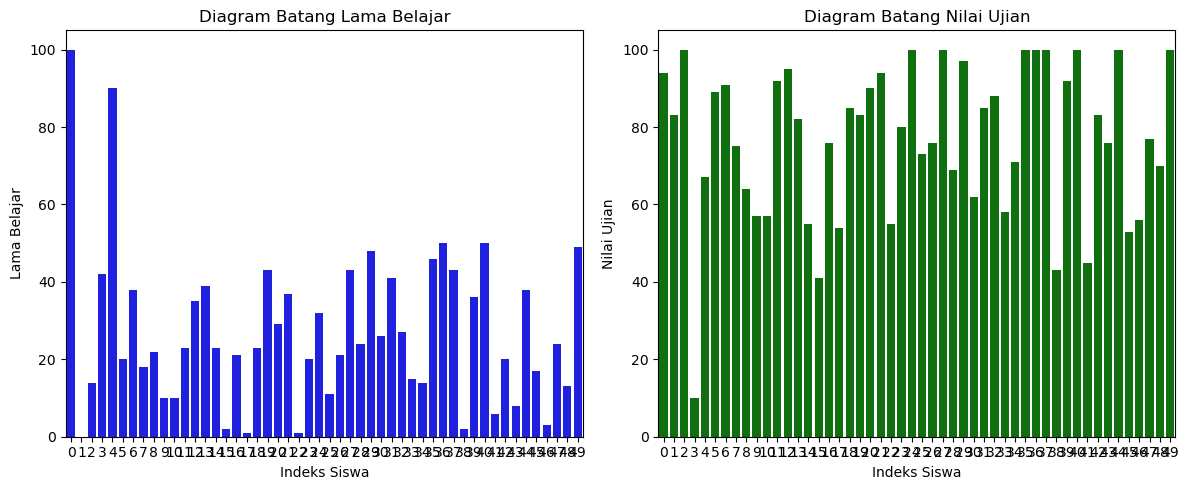

In [11]:
data_types = df.dtypes

# Visualisasi Diagram Batang untuk "Lama Belajar" dan "Nilai Ujian"
plt.figure(figsize=(12, 5))

# Diagram batang Lama Belajar
plt.subplot(1, 2, 1)
sns.barplot(x=df.index, y=df["Lama Belajar"], color="blue")
plt.xlabel("Indeks Siswa")
plt.ylabel("Lama Belajar")
plt.title("Diagram Batang Lama Belajar")

# Diagram batang Nilai Ujian
plt.subplot(1, 2, 2)
sns.barplot(x=df.index, y=df["Nilai Ujian"], color="green")
plt.xlabel("Indeks Siswa")
plt.ylabel("Nilai Ujian")
plt.title("Diagram Batang Nilai Ujian")

plt.tight_layout()
plt.show()


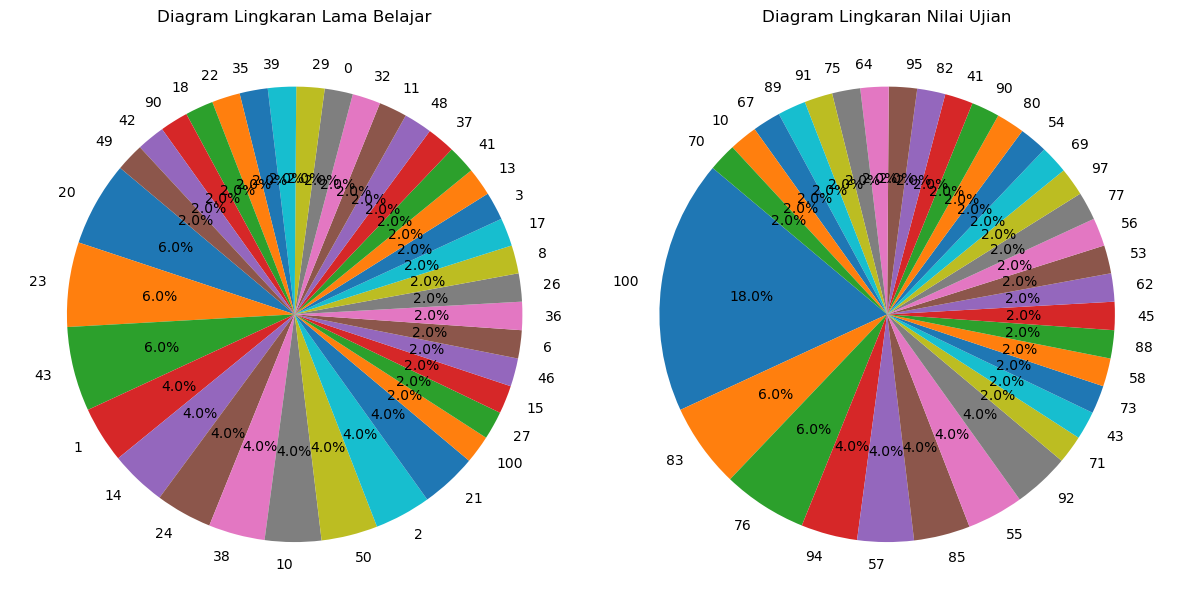

In [12]:
# Diagram lingkaran untuk Lama Belajar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(freq_lama_belajar["Frekuensi"], labels=freq_lama_belajar["Lama Belajar"], autopct='%1.1f%%', startangle=140)
plt.title("Diagram Lingkaran Lama Belajar")

# Diagram lingkaran untuk Nilai Ujian
plt.subplot(1, 2, 2)
plt.pie(freq_nilai_ujian["Frekuensi"], labels=freq_nilai_ujian["Nilai Ujian"], autopct='%1.1f%%', startangle=140)
plt.title("Diagram Lingkaran Nilai Ujian")

plt.tight_layout()
plt.show()


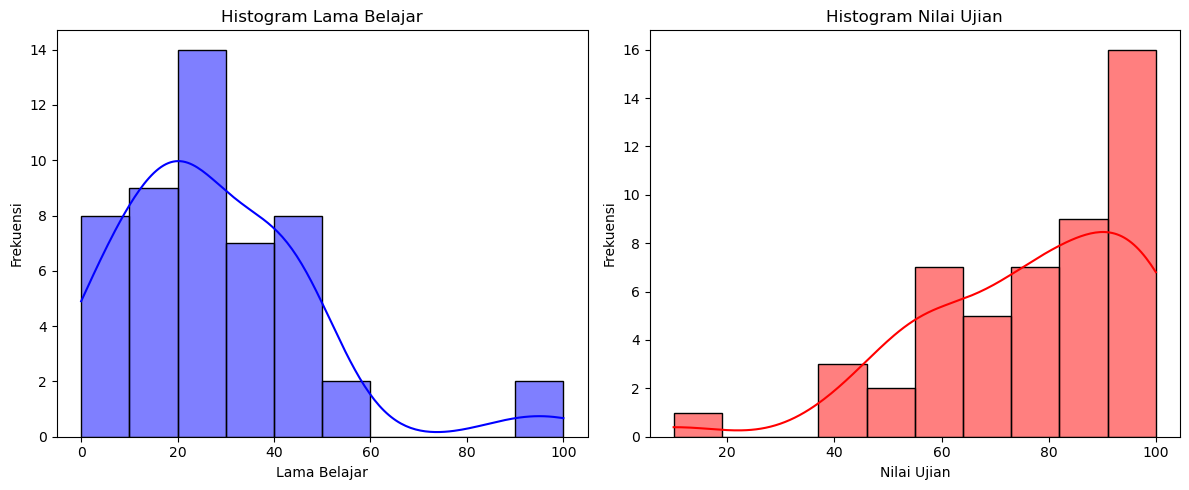

In [6]:
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Lama Belajar"], bins=10, kde=True, color="blue")
plt.xlabel("Lama Belajar")
plt.ylabel("Frekuensi")
plt.title("Histogram Lama Belajar")

plt.subplot(1, 2, 2)
sns.histplot(df["Nilai Ujian"], bins=10, kde=True, color="red")
plt.xlabel("Nilai Ujian")
plt.ylabel("Frekuensi")
plt.title("Histogram Nilai Ujian")

plt.tight_layout()
plt.show()


In [7]:
# Menghitung nilai mean, median, modus
mean_lama_belajar = df["Lama Belajar"].mean()
median_lama_belajar = df["Lama Belajar"].median()
mode_lama_belajar = df["Lama Belajar"].mode()[0]

mean_nilai_ujian = df["Nilai Ujian"].mean()
median_nilai_ujian = df["Nilai Ujian"].median()
mode_nilai_ujian = df["Nilai Ujian"].mode()[0]

(mean_lama_belajar, median_lama_belajar, mode_lama_belajar), (mean_nilai_ujian, median_nilai_ujian, mode_nilai_ujian)


((27.36, 23.0, 20), (76.86, 81.0, 100))

In [8]:
# Menghitung rentang, varians, dan simpangan baku

# Lama Belajar
range_lama_belajar = df["Lama Belajar"].max() - df["Lama Belajar"].min()
variance_lama_belajar = df["Lama Belajar"].var()
std_lama_belajar = df["Lama Belajar"].std()

# Nilai Ujian
range_nilai_ujian = df["Nilai Ujian"].max() - df["Nilai Ujian"].min()
variance_nilai_ujian = df["Nilai Ujian"].var()
std_nilai_ujian = df["Nilai Ujian"].std()

(range_lama_belajar, variance_lama_belajar, std_lama_belajar), (range_nilai_ujian, variance_nilai_ujian, std_nilai_ujian)


((100, 412.19428571428557, 20.302568451166113),
 (90, 402.40857142857135, 20.06012391358965))

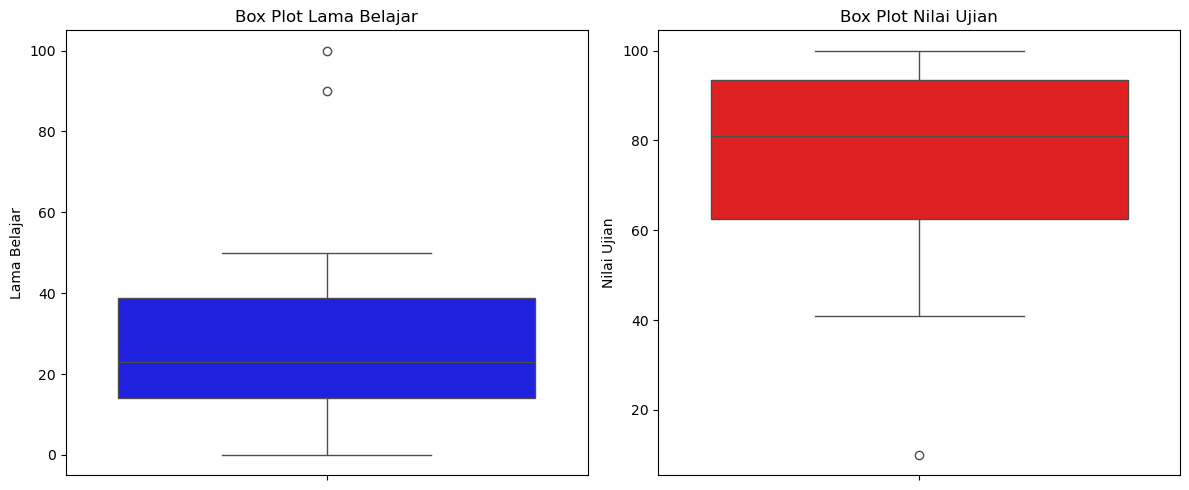

In [ ]:
# Box Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Lama Belajar"], color="blue")
plt.title("Box Plot Lama Belajar")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Nilai Ujian"], color="red")
plt.title("Box Plot Nilai Ujian")

plt.tight_layout()
plt.show()


In [10]:
# Menghitung outlier dengan IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_below = (data < lower_bound).sum()
    outliers_above = (data > upper_bound).sum()
    return outliers_below, outliers_above, outliers_below + outliers_above

outliers_lama_belajar = detect_outliers(df["Lama Belajar"])
outliers_nilai_ujian = detect_outliers(df["Nilai Ujian"])

outliers_lama_belajar, outliers_nilai_ujian


((0, 2, 2), (1, 0, 1))